# Author:- Biswajit Kumar Singh

# Decode 9.1 (Python Hackathon)

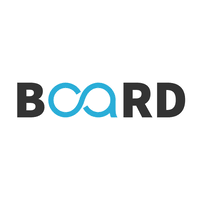

## Problem Statement:
* AJ Ecom Pvt Ltd is one of the leading business who have supermarkets across different regions of India. They want to understand the performance of their supermarket in terms of customers,products and its sale.

* Come up with minimum 10 different problem statements which could give valuable insights for AJ Pvt Ltd with the help of data analytics and science.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import datetime

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings("ignore")

## Importing Datasets

In [2]:
df1=pd.read_csv('Customer.csv')
df2=pd.read_csv('Transactions.csv')
df3=pd.read_csv('prod_cat_info.csv')

#### Data Cleaning on  customer csv file 

In [3]:
df1.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [5]:
df1.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [6]:
df1['Gender'].value_counts()

M    2892
F    2753
Name: Gender, dtype: int64

In [7]:
df1['city_code'].value_counts()

3.0     595
5.0     586
4.0     582
7.0     575
2.0     564
8.0     562
10.0    558
1.0     551
9.0     546
6.0     526
Name: city_code, dtype: int64

####  Filling The Missing Values 

In [8]:
# filling missing values of categorical variables with mode
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
df1['city_code'].fillna(df1['city_code'].mode()[0], inplace=True)

In [9]:
#checking for null values
df1.isnull().sum()

customer_Id    0
DOB            0
Gender         0
city_code      0
dtype: int64

#### Data formatting

In [10]:
df1['DOB'] = pd.to_datetime(df1['DOB'],format='%d-%m-%Y')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5647 non-null   object        
 3   city_code    5647 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [12]:
df1.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0
2,268159,1970-01-08,F,8.0
3,270181,1970-01-10,F,2.0
4,268073,1970-01-11,M,1.0


In [13]:
df1.insert(loc=4, column='month', value=df1.DOB.dt.month)
# +1 to make Monday=1.....until Sunday=7
df1.insert(loc=5, column='day', value=(df1.DOB.dt.dayofweek)+1)
df1.insert(loc=6, column='year', value=df1.DOB.dt.year)

In [14]:
df1.head()

,customer_Id,DOB,Gender,city_code,month,day,year
0,268408,1970-01-02,M,4.0,1,5,1970
1,269696,1970-01-07,F,8.0,1,3,1970
2,268159,1970-01-08,F,8.0,1,4,1970
3,270181,1970-01-10,F,2.0,1,6,1970
4,268073,1970-01-11,M,1.0,1,7,1970


### q.no 1:- Which Age Group of people are buying the products the more?

In [15]:
customer_age=df1['year'].value_counts(ascending=False)
customer_age

1975    277
1989    271
1988    264
1987    263
1979    263
1992    261
1980    261
1982    255
1971    248
1985    248
1977    246
1972    246
1974    246
1984    242
1981    235
1978    235
1986    231
1990    231
1970    227
1973    227
1976    226
1983    222
1991    222
Name: year, dtype: int64

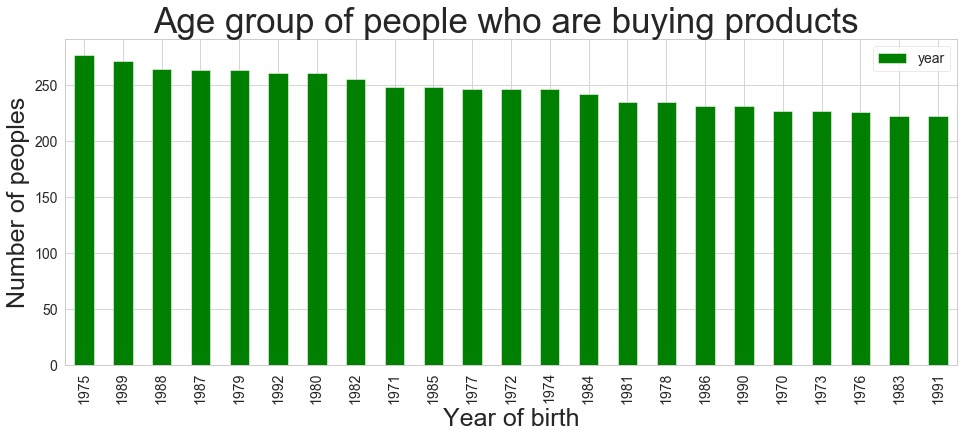

<Figure size 864x576 with 0 Axes>

In [17]:
customer_age.plot(kind='bar', figsize=(16, 6),color='g')
plt.xlabel('Year of birth',size=25) # add to x-label to the plot
plt.ylabel('Number of peoples',size=25) # add y-label to the plot
plt.title('Age group of people who are buying products ',fontsize=35) # add title to the plot
plt.legend()
plt.show()
plt.savefig("bar_plot_matplotlib_Python.png")

### observation:-
 * People from age group of 1975 has purchasing more number of items from super market stores, follows by 1989,1988 and so on 

## Q.no 2:- Which Gender is Contributing More In Sales of The Item ?

In [17]:
gender_count=df1['Gender'].value_counts()

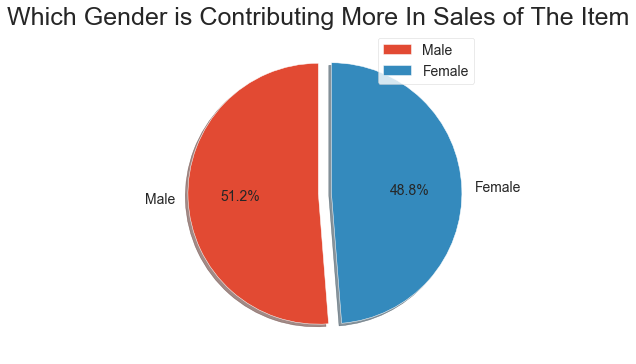

In [18]:
Labels=['Male','Female']
explode = (0, 0.1)
fig = plt.figure(figsize =(8, 6)) 
plt.pie(gender_count, labels = Labels,autopct='%1.1f%%',shadow=True, startangle=90,explode=explode) 
plt.title("Which Gender is Contributing More In Sales of The Item",fontsize=25)
plt.legend(labels = Labels) 
plt.show()

### Observations:-
* Male people are shopping more than female people from the supermarket

####  Finding Some Insights from prod_cat_info csv file

In [19]:
df3.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [20]:
df3.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [21]:
df3.shape

(23, 4)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


### Data Cleaning on  Transactions csv file

In [23]:
df2.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [24]:
df2.shape

(23053, 10)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [26]:
#renaming the column,because the name was differnt in transaction csv and prod_cat_code
df2.rename(columns = {'prod_subcat_code':'prod_sub_cat_code'}, inplace = True) 

In [27]:
df2.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
dtype: int64

In [28]:
#changing the dtypes of train_data
df2['tran_date']=pd.to_datetime(df2['tran_date'])

In [29]:
df2.insert(loc=10, column='month', value=df2.tran_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df2.insert(loc=11, column='day', value=(df2.tran_date.dt.dayofweek)+1)
df2.insert(loc=12, column='year', value=df2.tran_date.dt.year)

In [30]:
df2.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,month,day,year
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,2,5,2014
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,2,4,2014
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,2,1,2014
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,2,1,2014
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,2,7,2014


In [31]:
df2.shape

(23053, 13)

In [32]:
#removing the -ve sign from the dataset 
df4=df2[['Qty', 'Rate', 'Tax', 'total_amt']].apply(abs)

In [33]:
df4.head()

,Qty,Rate,Tax,total_amt
0,5,772,405.300,4265.300
1,5,1497,785.925,8270.925
2,2,791,166.110,1748.110
3,3,1363,429.345,4518.345
4,2,791,166.110,1748.110


In [34]:
df4.shape

(23053, 4)

In [35]:
#drooping the colmn which has negative values 
df2=df2.drop(['Qty','Rate','Tax','total_amt'],axis=1)

In [36]:
df2.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Store_type,month,day,year
0,80712190438,270351,2014-02-28,1,1,e-Shop,2,5,2014
1,29258453508,270384,2014-02-27,5,3,e-Shop,2,4,2014
2,51750724947,273420,2014-02-24,6,5,TeleShop,2,1,2014
3,93274880719,271509,2014-02-24,11,6,e-Shop,2,1,2014
4,51750724947,273420,2014-02-23,6,5,TeleShop,2,7,2014


In [37]:
#joining the two column, one with transaction csv with + ve column
df5 = pd.concat([df2, df4], join = 'outer', axis = 1)

In [38]:
df5.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Store_type,month,day,year,Qty,Rate,Tax,total_amt
0,80712190438,270351,2014-02-28,1,1,e-Shop,2,5,2014,5,772,405.300,4265.300
1,29258453508,270384,2014-02-27,5,3,e-Shop,2,4,2014,5,1497,785.925,8270.925
2,51750724947,273420,2014-02-24,6,5,TeleShop,2,1,2014,2,791,166.110,1748.110
3,93274880719,271509,2014-02-24,11,6,e-Shop,2,1,2014,3,1363,429.345,4518.345
4,51750724947,273420,2014-02-23,6,5,TeleShop,2,7,2014,2,791,166.110,1748.110


In [39]:
df5.shape

(23053, 13)

### Merge Transactions and prod_cat_info columns

In [40]:
#merge the transaction and prod_cat_info_column for finding more insights
data=pd.merge(df5,df3,on='prod_cat_code',how='inner')

In [41]:
data.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code_x,prod_cat_code,Store_type,month,day,year,Qty,Rate,Tax,total_amt,prod_cat,prod_sub_cat_code_y,prod_subcat
0,80712190438,270351,2014-02-28,1,1,e-Shop,2,5,2014,5,772,405.30,4265.30,Clothing,4,Mens
1,80712190438,270351,2014-02-28,1,1,e-Shop,2,5,2014,5,772,405.30,4265.30,Clothing,1,Women
2,80712190438,270351,2014-02-28,1,1,e-Shop,2,5,2014,5,772,405.30,4265.30,Clothing,3,Kids
3,79792372943,275108,2014-02-22,3,1,MBR,2,6,2014,3,908,286.02,3010.02,Clothing,4,Mens
4,79792372943,275108,2014-02-22,3,1,MBR,2,6,2014,3,908,286.02,3010.02,Clothing,1,Women


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_id       99293 non-null  int64         
 1   cust_id              99293 non-null  int64         
 2   tran_date            99293 non-null  datetime64[ns]
 3   prod_sub_cat_code_x  99293 non-null  int64         
 4   prod_cat_code        99293 non-null  int64         
 5   Store_type           99293 non-null  object        
 6   month                99293 non-null  int64         
 7   day                  99293 non-null  int64         
 8   year                 99293 non-null  int64         
 9   Qty                  99293 non-null  int64         
 10  Rate                 99293 non-null  int64         
 11  Tax                  99293 non-null  float64       
 12  total_amt            99293 non-null  float64       
 13  prod_cat             99293 non-

In [43]:
#checking for null values
data.isnull().sum()

transaction_id         0
cust_id                0
tran_date              0
prod_sub_cat_code_x    0
prod_cat_code          0
Store_type             0
month                  0
day                    0
year                   0
Qty                    0
Rate                   0
Tax                    0
total_amt              0
prod_cat               0
prod_sub_cat_code_y    0
prod_subcat            0
dtype: int64

In [44]:
#save the new merging file
#data.to_csv('file1.csv')

### qno 3:- Which category of items was selling more from the supermarkets ? 

In [45]:
prod_cat_sales=data['prod_cat'].value_counts(ascending=True)
prod_cat_sales

Bags                 3996
Clothing             8880
Footwear             8997
Home and kitchen    16516
Electronics         24490
Books               36414
Name: prod_cat, dtype: int64

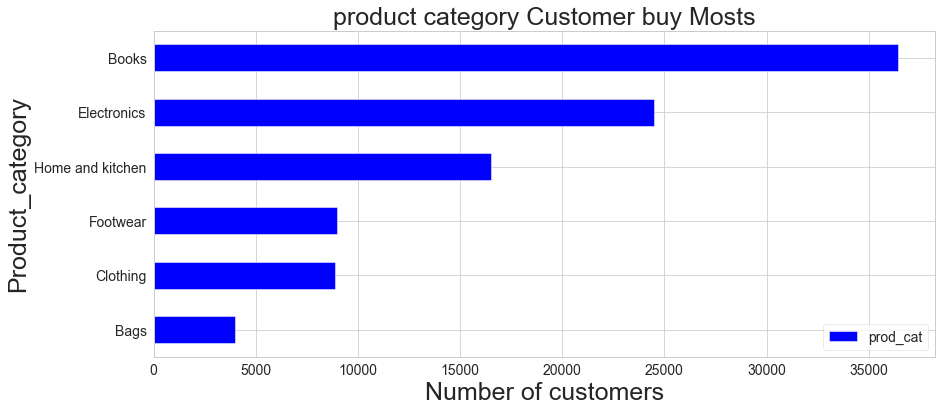

In [46]:
prod_cat_sales.plot(kind='barh', figsize=(14, 6),color='b')
plt.xlabel('Number of customers',size=25) # add to x-label to the plot
plt.ylabel('Product_category',size=25) # add y-label to the plot
plt.title('product category Customer buy Mosts',fontsize=25) # add title to the plot
plt.legend()
plt.show()

### Observation
* peoples are intersted to buy the books more from the supermarket,then elcronic items and so on 


### q.no 4 :- Which Store type Contribute to the highest sales ?

In [47]:
Store_type_max=data['Store_type'].value_counts()
Store_type_max

e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: Store_type, dtype: int64

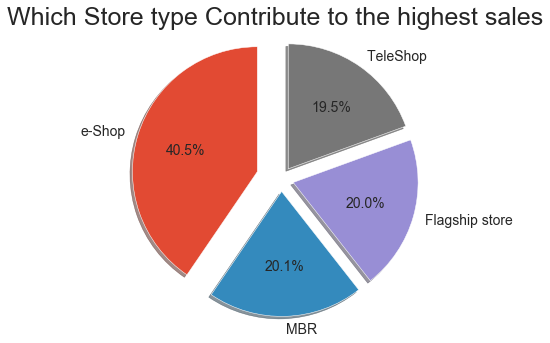

In [48]:
Labels=['e-Shop','MBR ','Flagship store','TeleShop ']
explode = (0.2, 0.1, 0.1, 0.1)
fig = plt.figure(figsize =(8, 5)) 
plt.pie(Store_type_max, labels = Labels,autopct='%1.1f%%',shadow=True, startangle=90,explode=explode) 
plt.title("Which Store type Contribute to the highest sales",fontsize=25)
plt.axis('equal')
plt.tight_layout()
plt.show()

### observations:
* E-shop category was contributing more number of sales from store type,followd by MBR and so on 

### q.no 5:- Which year contributing more number of sales ?

In [49]:
year_wise_sale=data['year'].value_counts()
year_wise_sale

2012    32589
2013    31866
2011    30246
2014     4592
Name: year, dtype: int64

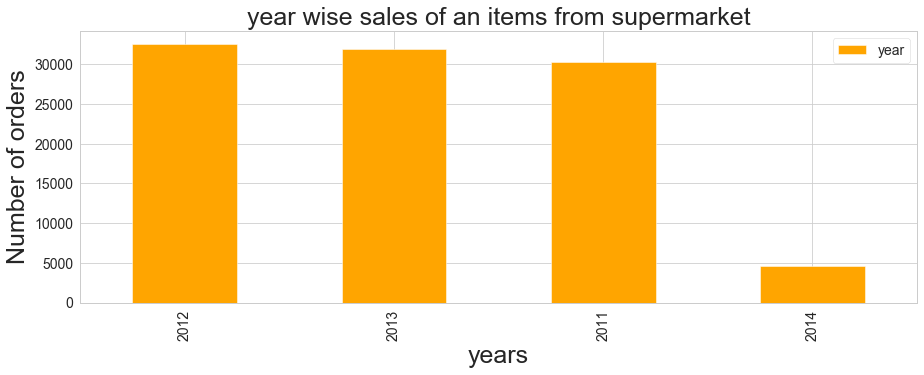

In [50]:
year_wise_sale.plot(kind='bar', figsize=(15, 5),color='orange')
plt.xlabel('years',size=25) # add to x-label to the plot
plt.ylabel('Number of orders',size=25) # add y-label to the plot
plt.title('year wise sales of an items from supermarket',fontsize=25) # add title to the plot
plt.legend()
plt.show()

### observations:-
* from the graph we see that in 2012 more number of items was sales from the supermarket, follows by 2013 

### q.no6:- Which month has maximum number of orders ?

In [51]:
data['month'].value_counts(ascending=False)

1     8777
10    8722
9     8565
3     8499
12    8309
8     8221
7     8195
2     8149
11    8039
5     8005
4     7975
6     7837
Name: month, dtype: int64

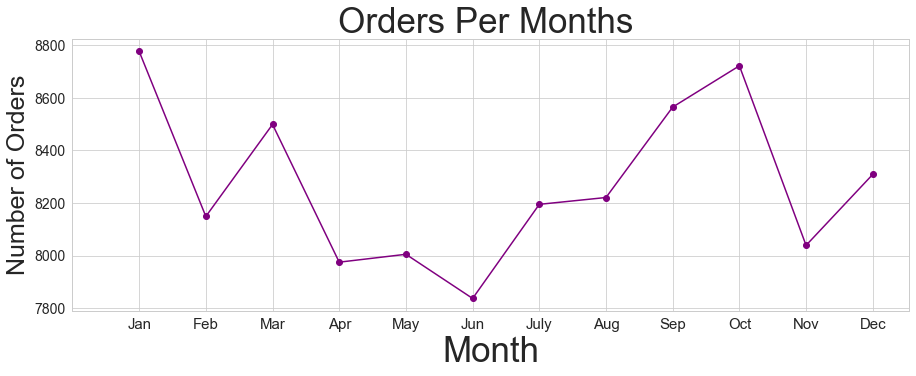

In [52]:
ax = data.groupby('month')['cust_id'].count().plot(kind='line',figsize=(15,5),color='purple',marker='o')
x=(' ','Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec')
xi=list(range(len(x)))
plt.xticks(xi,x,fontsize=15,rotation='horizontal')
ax.set_xlabel('Month',fontsize=35)
ax.set_ylabel('Number of Orders',fontsize=25)
ax.set_title('Orders Per Months ',fontsize=35)
plt.show()

### Observations:-
* From the month of jan the sales of items was high in a year, followed by oct and so on 

### q.no7:- Which day of the week has maximum number of orders ?

In [53]:
data['day'].value_counts()

7    14691
2    14368
4    14221
6    14175
3    14068
5    13974
1    13796
Name: day, dtype: int64

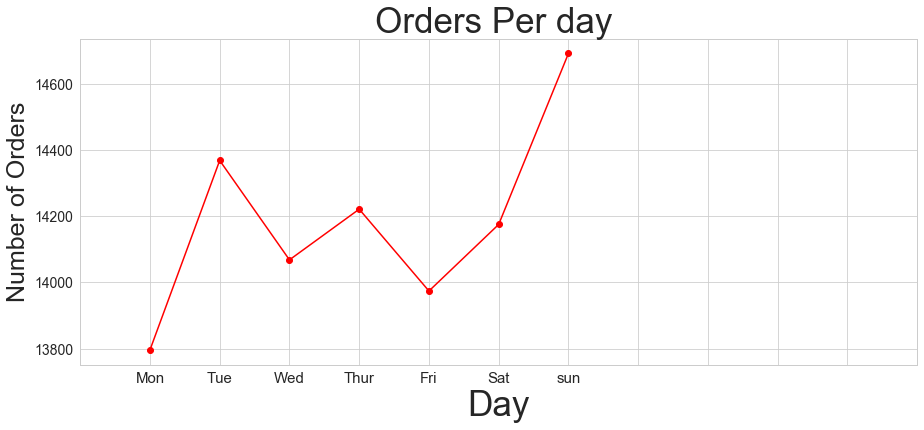

In [54]:
ax1 = data.groupby('day')['cust_id'].count().plot(kind='line',figsize=(15,6),color='red',marker='o')
y=(' ','Mon','Tue','Wed','Thur','Fri','Sat','sun')
yi=list(range(len(x)))
plt.xticks(yi,y,fontsize=15,rotation='horizontal')
ax1.set_xlabel('Day',fontsize=35)
ax1.set_ylabel('Number of Orders',fontsize=25)
ax1.set_title('Orders Per day ',fontsize=35)
plt.show()

### Observations:
* We observed that from seeing the above graph on the day of sun in every week the sales of the item was more from each day of the week followed by tue.

### Q.no 8:- Which sub_category related to  product peoples are  buying from supermarket ?

In [55]:
prod_sucat_sales=data['prod_subcat'].value_counts(ascending=True)
prod_sucat_sales

Furnishing             4129
Kitchen                4129
Bath                   4129
Tools                  4129
Personal Appliances    4898
Audio and video        4898
Computers              4898
Mobiles                4898
Cameras                4898
Kids                   5959
Fiction                6069
Comics                 6069
Children               6069
Academic               6069
DIY                    6069
Non-Fiction            6069
Mens                   7957
Women                  7957
Name: prod_subcat, dtype: int64

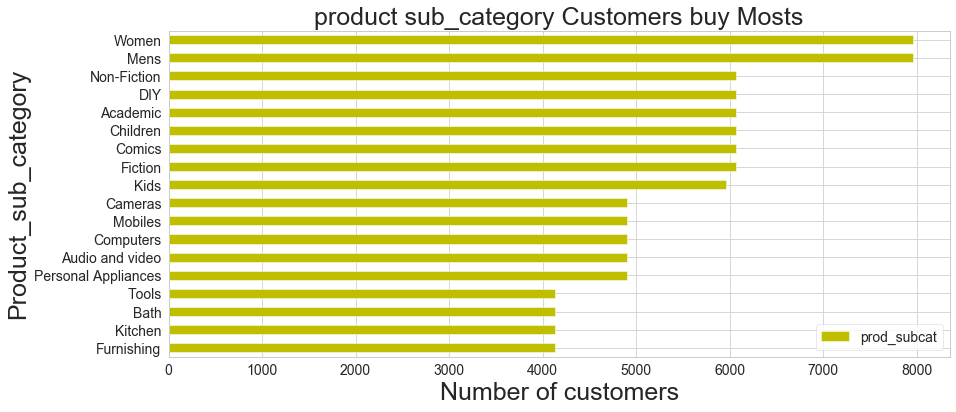

In [56]:
prod_sucat_sales.plot(kind='barh', figsize=(14, 6),color='y')
plt.xlabel('Number of customers',size=25) # add to x-label to the plot
plt.ylabel('Product_sub_category',size=25) # add y-label to the plot
plt.title('product sub_category Customers buy Mosts',fontsize=25) # add title to the plot
plt.legend()
plt.show()

### Observations:-
* mens and womens related product are peoples are buying more from the supermarket.

### q.no 9:- Which Store type Collecting maximum revenue ?

In [57]:
total_amt_coll=data.groupby('Store_type')['total_amt'].sum().sort_values(ascending=False)
total_amt_coll

Store_type
e-Shop            1.062168e+08
Flagship store    5.229261e+07
MBR               5.216797e+07
TeleShop          4.938094e+07
Name: total_amt, dtype: float64

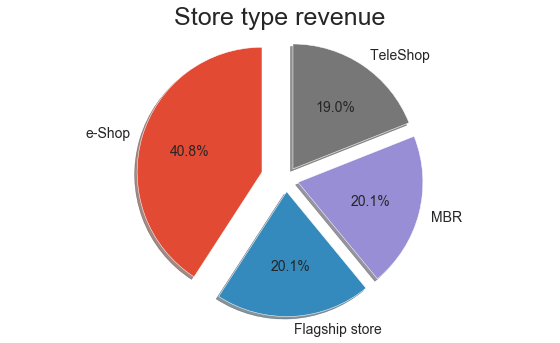

In [58]:
Labels=['e-Shop','Flagship store','MBR','TeleShop ']
explode = (0.2, 0.1, 0.1, 0.1)
fig = plt.figure(figsize =(8, 5)) 
plt.pie(total_amt_coll, labels = Labels,autopct='%1.1f%%',shadow=True, startangle=90,explode=explode) 
plt.title("Store type revenue",fontsize=25)
plt.axis('equal')
plt.tight_layout()
plt.show()

### observations:-
* from the above graph we observed that e-shop store type has earning maximum revenue from the others shop category 

In [59]:
#checking round of values  of total amount 

#e_Shop=round(1.062168e+08,2)
#e_Shop     :    106216800.0

#Flagship_store=round(5.229261e+07,2)
#Flagship_store :   52292610.0

#MBR=round(5.216797e+07,2)
#MBR        :     52167970.0

#TeleShop=round(4.938094e+07,2)
#TeleShop     :    49380940.0

### Q.no 10:- Which Store type Collecting more taxes on items ? 

In [60]:
total_tax_coll=data.groupby('Store_type')['Tax'].sum().sort_values(ascending=False)
total_tax_coll

Store_type
e-Shop            1.009300e+07
Flagship store    4.968981e+06
MBR               4.957137e+06
TeleShop          4.692307e+06
Name: Tax, dtype: float64

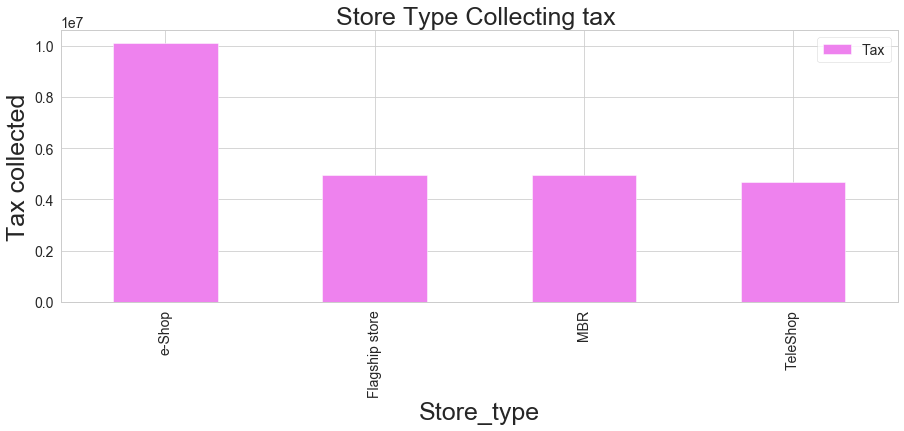

In [61]:
total_tax_coll.plot(kind='bar', figsize=(15, 5),color='violet')
plt.xlabel('Store_type',size=25) # add to x-label to the plot
plt.ylabel('Tax collected',size=25) # add y-label to the plot
plt.title('Store Type Collecting tax ',fontsize=25) # add title to the plot
plt.legend()
plt.show()

### Observations:-
*from the above graph we see that e-shop store type taking more number of taxes from people if they are buying some items from the superstore.

In [62]:
#checking the round of value of total tax collected from store type 

#e_Shop=round(1.009300e+07,2)
#e_Shop     :10093000.0

#TeleShop=round(4.692307e+06,2)
#TeleShop      :4692307.0

#Flagship_store=round(4.968981e+06,2)
#Flagship_store   :4968981.0


#MBR=round(4.957137e+06,2)
#MBR         :4957137.0

# Thank You 